In [632]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) 
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
iris = load_iris()

In [606]:
X_original = iris.data
Y = iris.target
features = iris.feature_names
targets = iris.target_names
sel_f = [0,1]
X = X_original[:,sel_f]

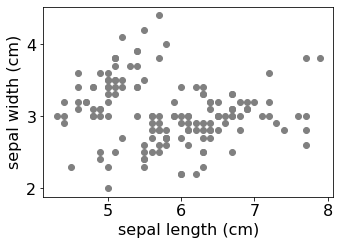

In [441]:
fig = plt.subplots(figsize =(5.2, 3.5))
plt.scatter(X[:,0],X[:,1], c='gray')
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
# plt.legend(handletextpad=0.1, fontsize=16)
# plt.title('Scatter plot on Iris dataset')
plt.savefig('unlabled_data.pdf', bbox_inches='tight')

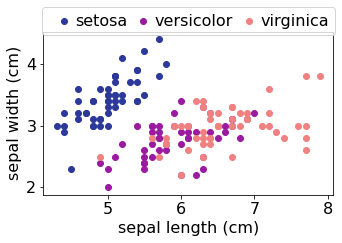

In [928]:
# colors = ['#F3AE4B', '#9C1DE7', '#6DB193']
colors = ['#2D3999', '#9A1BA0', '#F08181']
# colors = ['#00A8B5', '#F3AE4B', '#DE4383']
fig = plt.subplots(figsize =(5.2, 3))
for i, t in enumerate(targets):
    index = np.where(Y==i)[0]
    plt.scatter(X[index,0],X[index,1], c=colors[i], label=t)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
# plt.legend(loc='upper right', handletextpad=0.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3, columnspacing=0, handletextpad=-0.3)
# plt.title('Scatter plot on Iris dataset')
plt.savefig('labled_data.pdf', bbox_inches='tight')

In [443]:
rep_models = {}
class_models = {}
X_C = {}
for c in [0,1,2]:
    X_c = X[np.where(Y==c)[0],:] 
    X_C[c] = X_c
    rep_model = NearestNeighbors(n_neighbors=1, algorithm='ball_tree', metric='euclidean')
    rep_model.fit(X_c)
    rep_models[c] = rep_model
    
    class_model = NearestNeighbors(n_neighbors=50, algorithm='ball_tree', metric='euclidean')
    class_model.fit(X_c)
    class_models[c] = class_model

In [803]:
overall_model =  NearestNeighbors(n_neighbors=80, algorithm='ball_tree', metric='euclidean')
overall_model.fit(X)

NearestNeighbors(algorithm='ball_tree', metric='euclidean', n_neighbors=80)

In [912]:
ind = 31
x = X[ind,:]
y = Y[ind]

/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  import sys


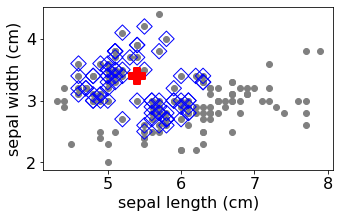

In [913]:
# instance-centered sampling
distances, indices = overall_model.kneighbors(x.reshape(1, -1))
N_x = X[indices[0][1:],:]
# highlighting x
fig = plt.subplots(figsize =(5.2, 3))
plt.scatter(X[:,0],X[:,1], c='gray')
plt.scatter(N_x[:,0],N_x[:,1],c='', edgecolor='blue', alpha=1.0, linewidth=1, marker='D', s=120)
plt.scatter(x[0], x[1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='P', s=250)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
plt.savefig(str(ind)+'_single_unlabled_data.pdf', bbox_inches='tight')

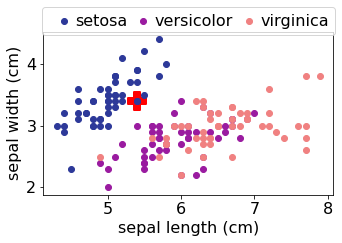

In [930]:
# instance-centered sampling
distances, indices = overall_model.kneighbors(x.reshape(1, -1))
N_x = X[indices[0][1:],:]
# highlighting x
# plt.scatter(X[:,0],X[:,1], c=Y)
fig = plt.subplots(figsize =(5.2, 3))
plt.scatter(x[0], x[1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='P', s=300)
for i, t in enumerate(targets):
    index = np.where(Y==i)[0]
    plt.scatter(X[index,0],X[index,1], c=colors[i], label=t)
# plt.scatter(N_x[:,0],N_x[:,1],c='', edgecolor='blue', alpha=1.0, linewidth=1.5, marker='D', s=100)

plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
# plt.legend(loc='upper right', handletextpad=0.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3, columnspacing=0, handletextpad=-0.3)
plt.savefig(str(ind)+'_single_labled_data.pdf', bbox_inches='tight')

f1_score: 0.9298245614035088
predict_proba [[1. 0. 0.]]


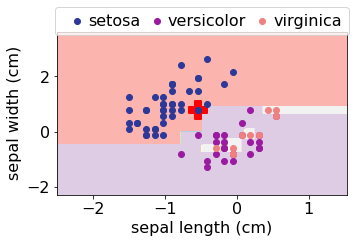

In [931]:
# instance-centered sampling
distances, indices = overall_model.kneighbors(x.reshape(1, -1))
N_x = X[indices[0][0:],:]
N_x_l = Y[indices[0][0:]]



X_ = N_x
y_ = N_x_l

# Standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X_ = (N_x - mean) / std

x_ = (x - mean) / std

fig = plt.subplots(figsize =(5.2, 3))

# Train
clf =DecisionTreeClassifier().fit(X_, y_)

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)



plt.xlabel(iris.feature_names[sel_f[0]])
plt.ylabel(iris.feature_names[sel_f[1]])
plt.axis("tight")

plt.scatter(x_[0], x_[1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='P', s=300)


# Plot the training points
for i, color in zip(range(n_classes), colors):
    idx = np.where(y_ == i)
    plt.scatter(X_[idx, 0], X_[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Set1)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3, columnspacing=0, handletextpad=-0.3)
plt.axis("tight")


pred = clf.predict(X_)
print('f1_score:', f1_score(y_,pred, average='weighted'))
print('predict_proba',clf.predict_proba(x_.reshape(1,-1)))
np.bincount(y_.astype(int))
plt.savefig(str(ind)+'_instance_labled_data.pdf', bbox_inches='tight')

/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


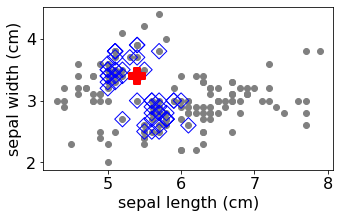

In [916]:
# multi-centerd sampling
x_hat = {}
for c in [0,1,2]:
    if c == y:
        x_hat[c] = x
    else:
        distances, indices = rep_models[c].kneighbors(x.reshape(1, -1))
        x_hat[c] = X_C[c][indices[0][0]].copy()
dist = []
data = []
for c in [0,1,2]:
    distances, indices = class_models[c].kneighbors(x_hat[c].reshape(1, -1))
    dist.append(distances[0])
    data.append(X_C[c][indices])
dist = np.hstack(dist)
data = np.hstack(data)
data = data[0]

sorted_indices = np.argsort(dist)
selected_indices = sorted_indices[:50]
N_x = data[selected_indices, :]

# highlighting x
fig = plt.subplots(figsize =(5.2, 3))
plt.scatter(X[:,0],X[:,1], c='gray')
plt.scatter(N_x[:,0],N_x[:,1],c='', edgecolor='blue', alpha=1.0, linewidth=1, marker='D', s=120)
plt.scatter(x[0], x[1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='P', s=250)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
plt.savefig(str(ind)+'_multi_unlabled_data.pdf', bbox_inches='tight')

/home/peyman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


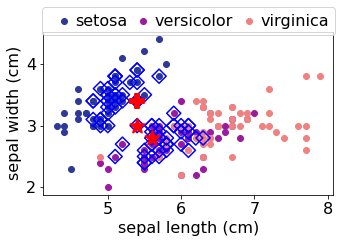

In [917]:
# multi-centerd sampling
x_hat = {}
for c in [0,1,2]:
    if c == y:
        x_hat[c] = x
    else:
        distances, indices = rep_models[c].kneighbors(x.reshape(1, -1))
        x_hat[c] = X_C[c][indices[0][0]].copy()
dist = []
data = []
for c in [0,1,2]:
    distances, indices = class_models[c].kneighbors(x_hat[c].reshape(1, -1))
    dist.append(distances[0])
    data.append(X_C[c][indices])
dist = np.hstack(dist)
data = np.hstack(data)
data = data[0]

sorted_indices = np.argsort(dist)
selected_indices = sorted_indices[:70]
N_x = data[selected_indices, :]

# highlighting x
# plt.scatter(X[:,0],X[:,1], c=Y)
fig = plt.subplots(figsize =(5.2, 3))
for i, t in enumerate(targets):
    index = np.where(Y==i)[0]
    plt.scatter(X[index,0],X[index,1], c=colors[i], label=t)
plt.scatter(N_x[:,0],N_x[:,1],c='', edgecolor='blue', alpha=1, linewidth=1.5, marker='D', s=100)
plt.scatter(x_hat[0][0], x_hat[0][1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='P', s=220)
plt.scatter(x_hat[1][0], x_hat[1][1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='*', s=220)
plt.scatter(x_hat[2][0], x_hat[2][1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='*', s=220)
plt.xlabel(features[sel_f[0]])
plt.ylabel(features[sel_f[1]])
# plt.legend(loc='upper right', handletextpad=0.1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3, columnspacing=0, handletextpad=-0.3)
plt.savefig(str(ind)+'_multi_labled_data.pdf',  bbox_inches='tight')

{0: 0, 1: 0.3999999999999999, 2: 0.6324555320336757}
f1_score: 0.9584090909090909
predict_proba [[1. 0. 0.]]


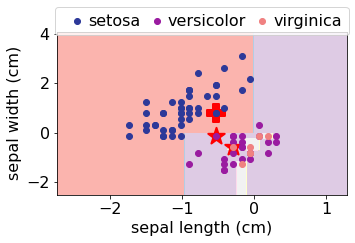

In [932]:
# multi-centerd sampling
x_hat = {}
x_dist = {}
for c in [0,1,2]:
    if c == y:
        x_hat[c] = x
        x_dist[c] = 0
    else:
        distances, indices = rep_models[c].kneighbors(x.reshape(1, -1))
        x_hat[c] = X_C[c][indices[0][0]].copy()
        x_dist[c] = distances[0][0]
        
print(x_dist)
dist = []
data = []
labels = []
for c in [0,1,2]:
    distances, indices = class_models[c].kneighbors(x_hat[c].reshape(1, -1))
    dist.append(distances[0] + x_dist[c])
    data.append(X_C[c][indices])
    labels.append(np.ones(len(indices[0]))*c)
dist = np.hstack(dist)
data = np.hstack(data)
labels = np.hstack(labels)
data = data[0]

sorted_indices = np.argsort(dist)
selected_indices = sorted_indices[:80]
N_x = data[selected_indices, :]
N_x_l = labels[selected_indices]

X_ = N_x
y_ = N_x_l

# Standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X_ = (N_x - mean) / std

for key, val in x_hat.items():
    x_hat[key] = (val - mean) / std
fig = plt.subplots(figsize =(5.2, 3))
    
# Train
clf = DecisionTreeClassifier().fit(X_, y_)

x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.xlabel(iris.feature_names[sel_f[0]])
plt.ylabel(iris.feature_names[sel_f[1]])
plt.axis("tight")

plt.scatter(x_hat[0][0], x_hat[0][1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='P', s=300)
plt.scatter(x_hat[1][0], x_hat[1][1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='*', s=300)
plt.scatter(x_hat[2][0], x_hat[2][1], c='red', edgecolor='red', alpha=1.0, linewidth=2, marker='*', s=300)

# Plot the training points
for i, color in zip(range(n_classes), colors):
    idx = np.where(y_ == i)
    plt.scatter(X_[idx, 0], X_[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Set1)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=3, columnspacing=0, handletextpad=-0.3)
plt.axis("tight")

pred = clf.predict(X_)
print('f1_score:', f1_score(y_,pred, average='weighted'))
print('predict_proba',clf.predict_proba(x_hat[0].reshape(1,-1)))
np.bincount(y_.astype(int))
plt.savefig(str(ind)+'_multi_labled_data.pdf',  bbox_inches='tight')